In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'the-oxfordiiit-pet-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F112480%2F268736%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240921%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240921T181752Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D63dc1e154bffd3f93eecea09400eb0fa6aef110e2f650c915feac6956a8d287082559907db5874fe95b0a1653d62fefa878469518e763bc86cc9ff1c3c75151c60d291d132272c076019566bab9c0e50d9493dce32a8d7ab58de49a6191824bb202750d638cd34f46c4febade19f9d5d0fd1273198cdbaf236f383ac334c81106810de443adcec1b8bf638bbe3a5debffe83f1bf9067baca1768b98db4d7ce408a1e0bba00835fba474bf30d45b3dfd07da02fdd4b4feb1ce75a9da2a3fdea60615931bf033e61175488411e44c553fa1aa14ceea155028d86f2ff994573d14e3eb5801566f8a8f806a35c981f03b799b2bf136b1ec8251bf3233914cf07a81c,annotation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5727113%2F9427642%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240921%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240921T181752Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D001cf2b32eb7e88fd065ba9442d685163969db2e156e7c6a4d104f92bcab4384abf187888329f39cd83e9bad0c9bb31dd969f202f205740e564c6d2fb4d7f22ff0c66d408899f52c0505efe59fd066031ec3f9ba9411d28be4eb5e9f4245e1c81f1e7d7bf2ba5ee8cd5529e871fe1751b9f5acfc782aec4f34e84d576176732b2c7efa50043f36299e7ba73f94247411e785af8cb1d472bc0dee4e4826145fbe987f13c601a1c9e48caf1e7f1d9c4132176ce271fcdfa457da072d0b353c5dff5e15d8d69ab8b52525ec3342cf106f0ea07b02b9b0c8d2ae010374c84ffc87b06dfee54abb692a865fddbb9dcf3de2b0ab86636ba875ab85dd94a5859537edc7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1585267331 bytes downloaded
Downloaded and uncompressed: the-oxfordiiit-pet-dataset
[==================================================] 18875 bytes downloaded
Downloaded and uncompressed: annotation
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/scottish_terrier_136.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/english_setter_1.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/beagle_85.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/miniature_pinscher_133.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Siamese_203.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/pug_32.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/pomeranian_151.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/pug_44.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/german_shorthaired_155.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Ragdoll_184.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/pug_121.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/japanese_chin_17.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/wheaten_terrie

In [3]:
import os
os.listdir('/kaggle/input')


['the-oxfordiiit-pet-dataset', 'annotation']

# Required imports

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import to_pil_image


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [5]:
images_file = "/kaggle/input/the-oxfordiiit-pet-dataset/images"

# Display some images from the dataset

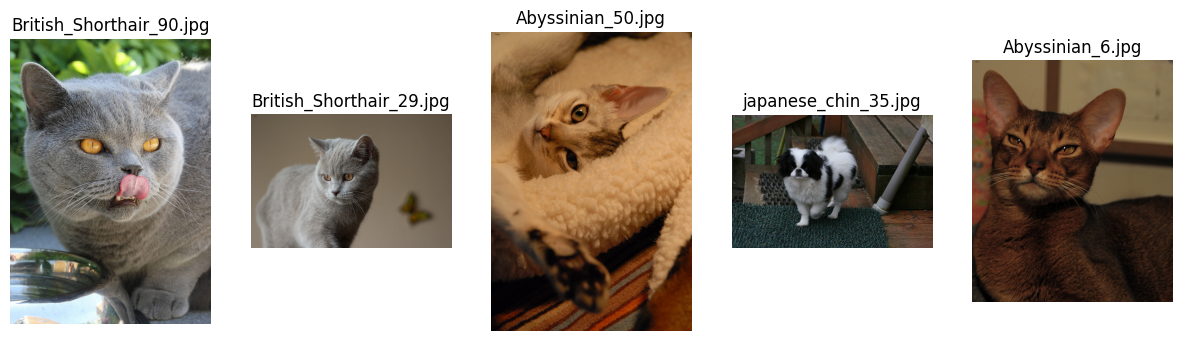

In [6]:
def display_first_n_images(img_dir, n=5):
    # Get a list of image file names from the directory
    img_files = [f for f in os.listdir(images_file) if f.endswith('.jpg') or f.endswith('.png')]

    # Limit the number of images to display
    img_files = img_files[:n]

    # Create a plot with subplots
    plt.figure(figsize=(15, 10))

    # Loop through the image files and display each one
    for i, img_file in enumerate(img_files):
        img_path = os.path.join(img_dir, img_file)
        image = Image.open(img_path).convert('RGB')

        # Display the image
        plt.subplot(1, n, i + 1)
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        plt.title(img_file)  # Show file name as title

    plt.show()

# Use the function to display the first 5 images
display_first_n_images(images_file, n=5)


The images have a large variations in scale, pose and lighting.


# Step 1: Dataset Preparation



### 1.1. Extract the dataset info

In [7]:
# Load list.txt
list_file = os.path.join('/kaggle/input/annotation', 'list.txt') #Combined list of all images in the dataset Each entry in the file is of following nature: Image CLASS-ID SPECIES BREED ID

# Read the file skipping the first 6 lines (header)
with open(list_file, 'r') as f:
    lines = f.readlines()[6:]

# Create a dataframe with columns: Image, Class ID, Species, Breed ID
data = [line.strip().split() for line in lines]
df = pd.DataFrame(data, columns=['Image', 'Class_ID', 'Species', 'Breed_ID'])

# Convert data types
df['Class_ID'] = df['Class_ID'].astype(int)
df['Species'] = df['Species'].astype(int)  # 1: Cat, 2: Dog
df['Breed_ID'] = df['Breed_ID'].astype(int)

# Show the first few rows of the dataframe
df.head(10)

Image  Class_ID  Species  Breed_ID
0  Abyssinian_100         1        1         1
1  Abyssinian_101         1        1         1
2  Abyssinian_102         1        1         1
3  Abyssinian_103         1        1         1
4  Abyssinian_104         1        1         1
5  Abyssinian_105         1        1         1
6  Abyssinian_106         1        1         1
7  Abyssinian_107         1        1         1
8  Abyssinian_108         1        1         1
9  Abyssinian_109         1        1         1

The length of the dataframe

In [ ]:

print(f'The length of the dataframe is: {len(df)}')


The length of the dataframe is: 7349



		ID: 1:37 Class ids
        
		SPECIES: 1:Cat 2:Dog
        
		BREED ID: 1-25:Cat 1:12:Dog
        
		All images with 1st letter as captial are cat images while images with small first letter are dog images.

In [ ]:
# Print unique Class IDs
unique_class_ids = df['Class_ID'].unique()
print("\nUnique Class IDs:")
print(unique_class_ids)

# Print unique Species values
unique_species = df['Species'].unique()
print("\nUnique Species values:")
print(unique_species)

# Print unique Breed IDs
unique_breed_ids = df['Breed_ID'].unique()
print("\nUnique Breed IDs:")
print(unique_breed_ids)


Unique Class IDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]

Unique Species values:
[1 2]

Unique Breed IDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


Class_ID
1     198
2     200
3     200
4     200
5     200
6     200
7     200
8     184
9     199
10    200
11    200
12    190
13    196
14    200
15    200
16    200
17    200
18    200
19    199
20    200
21    200
22    200
23    196
24    200
25    200
26    200
27    200
28    200
29    200
30    200
31    199
32    200
33    199
34    200
35    189
36    200
37    200
Name: count, dtype: int64


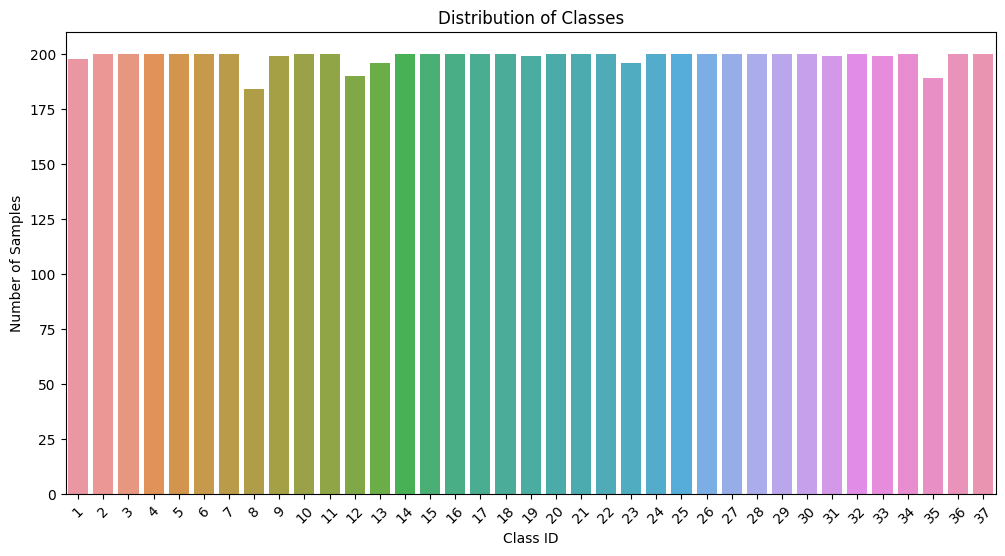

In [ ]:
class_counts = df['Class_ID'].value_counts().sort_index()

# Print the class counts
print(class_counts)

# Plot the distribution of classes
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Classes')
plt.xlabel('Class ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


The dataset shows a mostly balanced class distribution

### 1.2. Split the dataset

The split ratio(80% for training and validation, 20% for testing) is a commonly used practice in machine learning, it ensures that there is a decent amount of data in both sets to avoid skewed or biased results during model tuning.

In [8]:
# First, split the dataset into 80% training + validation, and 20% test
trainval_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class_ID'])

# Now, split the remaining 80% into 80% training and 20% validation
train_df, val_df = train_test_split(trainval_df, test_size=0.2, random_state=42, stratify=trainval_df['Class_ID'])

# Check the sizes of each split
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Training set size: 4703
Validation set size: 1176
Test set size: 1470


### 1.3. Class for loading the pet images and their labels

In [9]:
class PetDataset(Dataset):
    # Constructor to initialize the dataset
    def __init__(self, data, transform=None):
        """
        Args:
        - data: A pandas DataFrame containing image names, class IDs, species, and breed IDs.
        - img_dir: Directory where the images are stored.
        - transform]: A function/transform to apply to the images.
        """
        self.data = data  # Store the dataset metadata (image names, class IDs, etc.)
        self.img_dir = images_file  # Store the directory where the images are located
        self.transform = transform  # Store any transformations to be applied to the images

    # Method to return the total number of items in the dataset
    def __len__(self):
        """
        Returns:
        - int: The number of samples in the dataset.
        """
        return len(self.data)  # Return the number of rows in the dataframe (number of images)

    # Method to load and return a single sample from the dataset
    def __getitem__(self, idx):
        """
        Args:
        - idx (int): The index of the sample to retrieve.

        Returns:
        - tuple: (image, label), where:
            - image (PIL Image or Tensor): The loaded image (with transformations applied if given).
            - label (int): The corresponding class label (adjusted to be 0-based).
        """
        # Retrieve the image file name (without extension) from the dataset and construct the full path
        img_name = os.path.join(self.img_dir, self.data.iloc[idx, 0] + '.jpg')

        # Open the image and convert it to RGB format (in case it's grayscale or other formats)
        image = Image.open(img_name).convert('RGB')

        # Retrieve the class ID from the dataset and adjust it to be zero-indexed (subtract 1)
        # The dataset class IDs are 1 to 37, so I subtract 1 to make it 0 to 36
        label = self.data.iloc[idx, 1] - 1

        # If a transformation is provided, apply it to the image
        if self.transform:
            image = self.transform(image)

        # Return the transformed image and the corresponding label
        return image, label


### 1.4. Data Transformation


Load the Models weights and the necessary transformation


The transformation pipeline for ResNet

```
Resnet_transform = T.Compose([
    # Step 1: Resize the image to 232x232 pixels using bilinear interpolation.
    # This helps to create a buffer for the center crop that follows.
    T.Resize(232, interpolation=T.InterpolationMode.BILINEAR),
    
    # Step 2: Crop the center 224x224 pixels from the resized image.
    # The model expects 224x224 input, and this ensures a consistent size.
    T.CenterCrop(224),
    
    # Step 3: Convert the image from a PIL image (or NumPy array) to a PyTorch tensor.
    # Additionally, it scales the pixel values from [0, 255] to [0, 1] by dividing by 255..
    T.ToTensor(),
    
    # Step 4: Normalize the image using the mean and std deviation of ImageNet dataset.
    # These values (mean and std) were used when training the model on ImageNet, so they ensure the input is processed in a way that is compatible with the pretrained weights.
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])


```




ResNet and VGG expect input images of size 224x224 pixels, so the preprocessing is the same for these models.

In [10]:
# Load pretrained weights for various models
ResNet50_weights = models.resnet.ResNet50_Weights.DEFAULT
ResNet34_weights = models.resnet.ResNet34_Weights.DEFAULT

# Get the preprocessing transforms required by each model
preprocess = ResNet34_weights.transforms()

### 1.5. Create dataset instances and dataloaders

In [11]:
# Create dataset instances
train_dataset = PetDataset(data=train_df, transform=preprocess)
val_dataset = PetDataset(data=val_df, transform=preprocess)
test_dataset = PetDataset(data=test_df, transform=preprocess)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)
# small batch size due to limited gpu
#num_workers=2 Multiple subprocesses are used to load data in parallel, improving the performance when loading large datasets .

#Number of Batches
print("Train batches:", len(train_loader))
print("Val batches:",len(val_loader))
print("Test batches:",len(test_loader))

Train batches: 294
Val batches: 74
Test batches: 92


### 1.6. Visualize the image before and after the transformation.


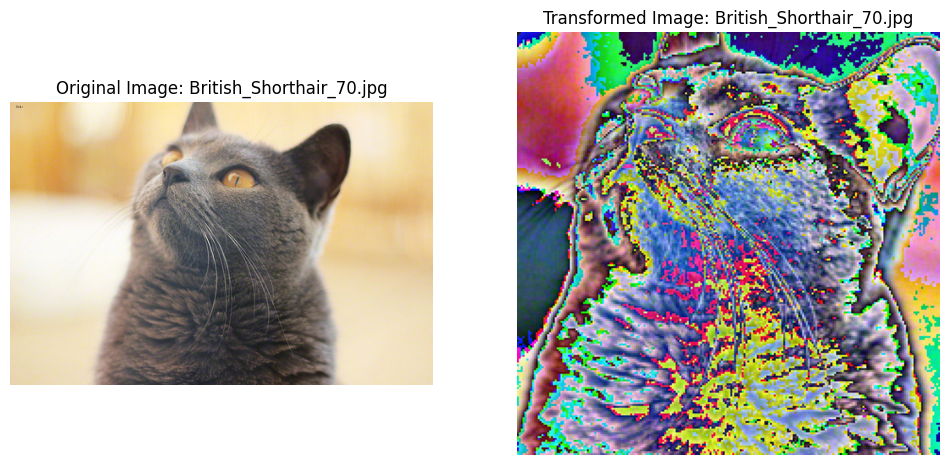

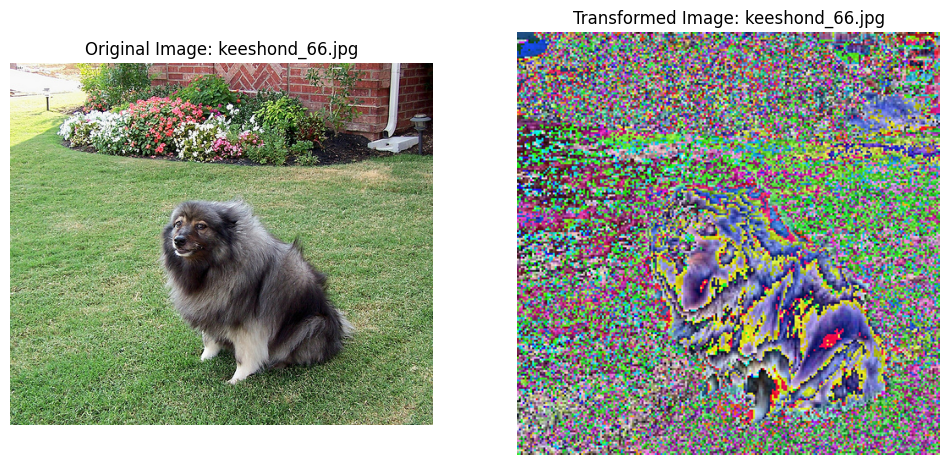

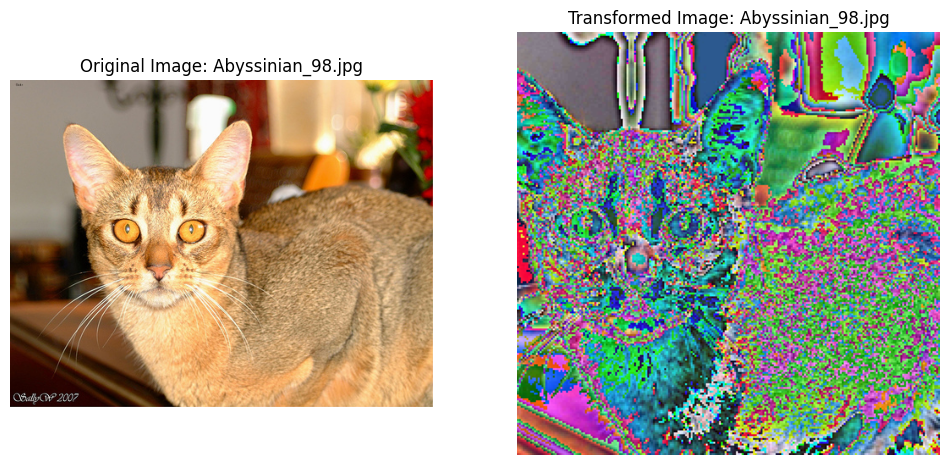

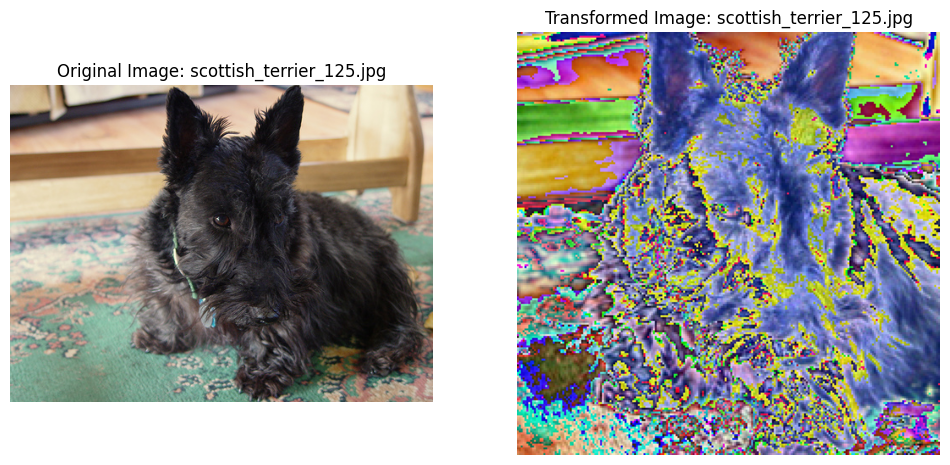

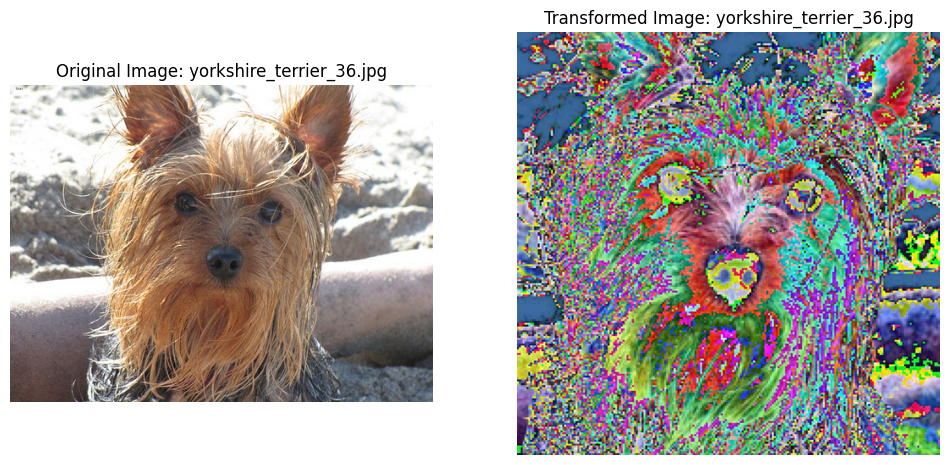

In [ ]:
def visualize_before_after(dataset, idx):
    """
    Visualizes the image before and after the transformation.

    Args:
    - dataset: The dataset instance (train_dataset or val_dataset).
    - idx: The index of the sample to visualize.
    """

    # Retrieve the image and label from the dataset
    img_name = dataset.data.iloc[idx, 0] + '.jpg'
    img_path = os.path.join(dataset.img_dir, img_name)

    # Load the image before transformation
    original_image = Image.open(img_path).convert('RGB')

    # Get the transformed image (after transformation)
    transformed_image, label = dataset[idx]  # This returns the transformed image and label

    # Convert the transformed tensor back to a PIL image for visualization
    transformed_image_pil = to_pil_image(transformed_image) if isinstance(transformed_image, torch.Tensor) else transformed_image

    # Plot original image and transformed image side by side
    plt.figure(figsize=(12, 6))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title(f"Original Image: {img_name}")
    plt.axis('off')

    # Show transformed image
    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image_pil)
    plt.title(f"Transformed Image: {img_name}")
    plt.axis('off')

    plt.show()

# Visualize the first 5 images in the training set before and after transformation
for i in range(5):
    visualize_before_after(train_dataset, i)


The change in colors after applying the transformations is due to the normalization step in the preprocessing pipeline. The pretrained ResNet model expects the images to be normalized with specific mean and standard deviation values, typically for each RGB channel.

# Step 2: Model Development

### 2.1. Model Architectures

In [16]:
# Load pretrained EfficientNetB0 model
efficientnet_b0 = models.efficientnet_b0(pretrained=True)
efficientnet_b0.classifier[1] = nn.Linear(in_features=efficientnet_b0.classifier[1].in_features, out_features=37)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
efficientnet_b0 = efficientnet_b0.to(device)

# Print to confirm the model architecture
print(efficientnet_b0)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 103MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

### 2.2. Helper Methods

2.2.1. Training Method

In [12]:
best_model_info = {
    'model': None,  # Store the actual model
    'model_name': None,
    'optimizer': None,
    'learning_rate': None,
    'accuracy': 0.0
}

def train_model(model, criterion, optimizer, num_epochs=10, model_name=None, optimizer_name=None, learning_rate=None):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        correct_train_preds = 0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Zero gradients for every batch
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)  # Compute predictions
            correct_train_preds += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_train_preds / len(train_dataset)

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}')

        # Validation Phase
        model.eval()
        correct_val_preds = 0
        running_val_loss = 0.0

        with torch.no_grad():
            for i, (inputs, labels) in enumerate(val_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

                _, preds = torch.max(outputs, 1)
                correct_val_preds += torch.sum(preds == labels.data)

        val_loss_avg = running_val_loss / len(val_loader)
        val_acc = correct_val_preds / len(val_dataset)

        val_losses.append(val_loss_avg)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss_avg:.4f}, Validation Accuracy: {val_acc:.4f}')

        # Save the best model info
        if val_acc > best_model_info['accuracy']:
            best_model_info['model'] = model
            best_model_info['model_name'] = model_name
            best_model_info['optimizer'] = optimizer_name
            best_model_info['learning_rate'] = learning_rate
            best_model_info['accuracy'] = val_acc

    return train_losses, val_losses, train_accuracies, val_accuracies


#### 2.2.2. Testing Method

In [32]:
def test_model(model, test_loader, class_names):
    model.eval()
    running_test_loss = 0.0
    correct_test_preds = 0

    criterion = nn.CrossEntropyLoss()

    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()

            _, preds = torch.max(outputs, 1)  # Get predictions
            correct_test_preds += torch.sum(preds == labels.data)

            # Store predictions and true labels for detailed evaluation
            all_test_preds.extend(preds.cpu().numpy())
            all_test_labels.extend(labels.cpu().numpy())

    test_loss_avg = running_test_loss / len(test_loader)
    test_accuracy = correct_test_preds.double() / len(test_loader.dataset)

    # Print test metrics
    print(f'Test Loss: {test_loss_avg:.4f}, Test Accuracy: {test_accuracy:.4f}')

    # Calculate and print precision, recall, and F1-score for each class
    print("\nTest Classification Metrics:")
    print(classification_report(all_test_labels, all_test_preds, target_names=class_names))  # Replace class_names with actual class labels

    return test_loss_avg, test_accuracy, np.array(all_test_preds), np.array(all_test_labels)



#### 2.2.3. Plotting Losses and Accuracies Method

In [14]:
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, num_epochs):
    epochs = range(1, num_epochs + 1)

    # Convert any tensors to numpy (after moving them to CPU if necessary) The error you're encountering is because PyTorch tensors residing on a CUDA device (GPU) cannot be directly converted to NumPy arrays. To resolve this, you need to move the tensors back to the CPU before converting them to NumPy format for plotting or other tasks.
    train_losses = [loss.cpu().item() if torch.is_tensor(loss) else loss for loss in train_losses]
    val_losses = [loss.cpu().item() if torch.is_tensor(loss) else loss for loss in val_losses]
    train_accuracies = [acc.cpu().item() if torch.is_tensor(acc) else acc for acc in train_accuracies]
    val_accuracies = [acc.cpu().item() if torch.is_tensor(acc) else acc for acc in val_accuracies]

    # Plot Losses
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Losses over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Accuracies over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


2.2.4. Plotting Confusion Matrix

In [15]:
def plot_confusion_matrix(preds, labels, class_names):
    cm = confusion_matrix(labels, preds, labels=[i for i in range(37)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[i for i in range(37)])

    fig, ax = plt.subplots(figsize=(20, 10))
    disp.plot(ax=ax)
    plt.show()

### 2.4. Training Phase

Epoch 1/15, Training Loss: 0.8206, Training Accuracy: 0.8299
Validation Loss: 0.4178, Validation Accuracy: 0.9065
Epoch 2/15, Training Loss: 0.5134, Training Accuracy: 0.8790
Validation Loss: 0.3066, Validation Accuracy: 0.9226
Epoch 3/15, Training Loss: 0.3445, Training Accuracy: 0.9196
Validation Loss: 0.2523, Validation Accuracy: 0.9252
Epoch 4/15, Training Loss: 0.2661, Training Accuracy: 0.9379
Validation Loss: 0.2396, Validation Accuracy: 0.9320
Epoch 5/15, Training Loss: 0.1921, Training Accuracy: 0.9560
Validation Loss: 0.2289, Validation Accuracy: 0.9303
Epoch 6/15, Training Loss: 0.1595, Training Accuracy: 0.9664
Validation Loss: 0.2220, Validation Accuracy: 0.9303
Epoch 7/15, Training Loss: 0.1255, Training Accuracy: 0.9747
Validation Loss: 0.2280, Validation Accuracy: 0.9269
Epoch 8/15, Training Loss: 0.0962, Training Accuracy: 0.9821
Validation Loss: 0.2170, Validation Accuracy: 0.9362
Epoch 9/15, Training Loss: 0.0830, Training Accuracy: 0.9853
Validation Loss: 0.2225, Va

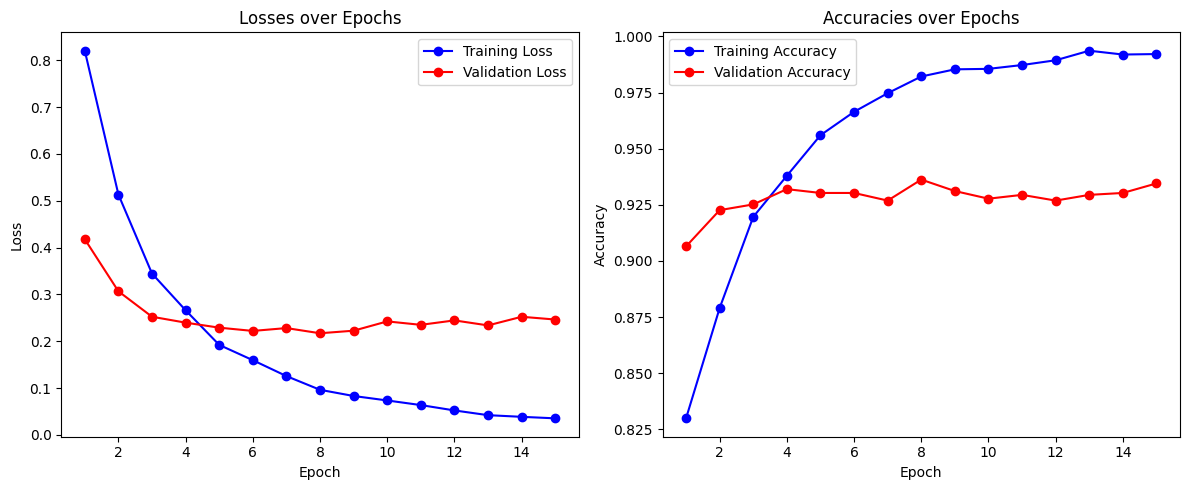

In [18]:
optimizer = torch.optim.Adam(efficientnet_b0.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
                efficientnet_b0,
                criterion,
                optimizer,
                num_epochs=15,
                model_name="efficientnet_b0",
                optimizer_name='Adam',
                learning_rate=0.00005
            )
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, num_epochs=15)


In [19]:
print(f"Best Model: {best_model_info['model_name']}")
print(f"Optimizer: {best_model_info['optimizer']}")
print(f"Learning Rate: {best_model_info['learning_rate']}")
print(f"Validation Accuracy: {best_model_info['accuracy']:.4f}")

Best Model: efficientnet_b0
Optimizer: Adam
Learning Rate: 5e-05
Validation Accuracy: 0.9362


#### 2.4.4. Third Trial with adding extra layers to EffecientNetB0

In [20]:
# Load pretrained EfficientNetB0 model
efficientnet = models.efficientnet_b0(pretrained=True)

# Remove the final fully connected layer (the classifier) to keep only the feature extraction layers
efficientnet_features = nn.Sequential(*list(efficientnet.children())[:-2])

# Pooling layer to adapt the output to a fixed size (e.g., (1, 1))
efficientnet_pool = nn.AdaptiveAvgPool2d((1, 1))

# Initialize a dummy input to get the output size of the feature extractor
dummy_input = torch.zeros(1, 3, 224, 224)  # Adjust input size if necessary
with torch.no_grad():
    x = efficientnet_features(dummy_input)
    x = efficientnet_pool(x)
    out_features = x.numel()  # Get the number of features after pooling

print(f"EfficientNetB0 output features size: {out_features}")

# Define the custom layers
efficientnet_custom = nn.Sequential(
    nn.Flatten(),  # Flatten the output from the pooling layer
    nn.Linear(out_features, 512),  # First custom fully connected layer
    nn.ReLU(),  # Activation function
    nn.Dropout(0.5),  # Dropout layer for regularization
    nn.Linear(512, len(df['Class_ID'].unique()))  # Final output layer
)

# Combine the feature extractor and custom layers into the final model
efficientnet_b0_model = nn.Sequential(
    efficientnet_features,
    efficientnet_pool,
    efficientnet_custom
)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
efficientnet_b0_model.to(device)

# Print to confirm the model architecture
print(efficientnet_b0_model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNetB0 output features size: 1280
Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=Tr

Epoch 1/15, Training Loss: 0.0303, Training Accuracy: 0.9945
Validation Loss: 0.2471, Validation Accuracy: 0.9328
Epoch 2/15, Training Loss: 0.0328, Training Accuracy: 0.9934
Validation Loss: 0.2356, Validation Accuracy: 0.9320
Epoch 3/15, Training Loss: 0.0343, Training Accuracy: 0.9936
Validation Loss: 0.2373, Validation Accuracy: 0.9328
Epoch 4/15, Training Loss: 0.0281, Training Accuracy: 0.9955
Validation Loss: 0.2361, Validation Accuracy: 0.9345
Epoch 5/15, Training Loss: 0.0344, Training Accuracy: 0.9938
Validation Loss: 0.2290, Validation Accuracy: 0.9362
Epoch 6/15, Training Loss: 0.0262, Training Accuracy: 0.9949
Validation Loss: 0.2417, Validation Accuracy: 0.9337
Epoch 7/15, Training Loss: 0.0306, Training Accuracy: 0.9953
Validation Loss: 0.2416, Validation Accuracy: 0.9354
Epoch 8/15, Training Loss: 0.0342, Training Accuracy: 0.9928
Validation Loss: 0.2441, Validation Accuracy: 0.9303
Epoch 9/15, Training Loss: 0.0320, Training Accuracy: 0.9940
Validation Loss: 0.2438, Va

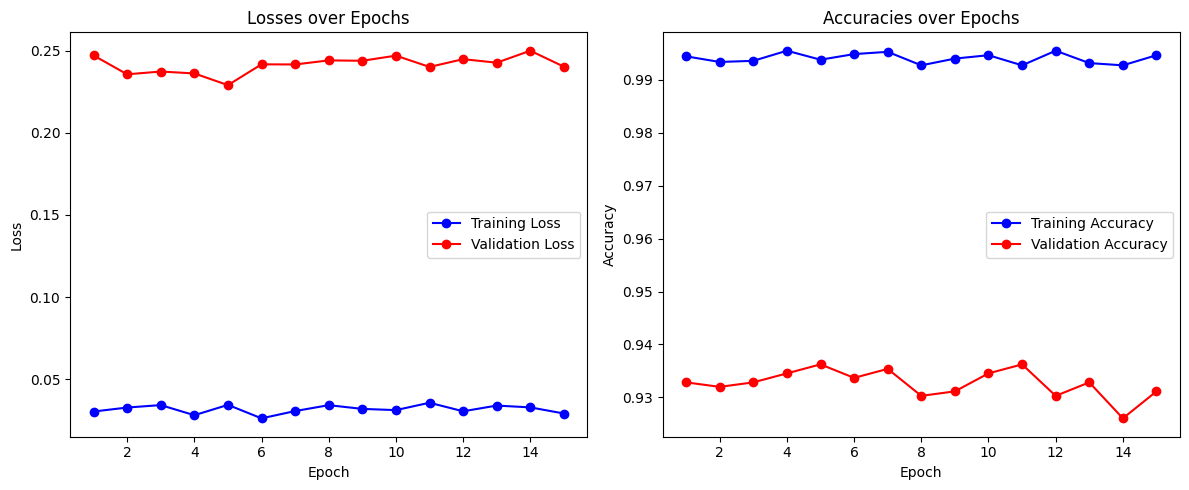

In [23]:
optimizer = torch.optim.Adam(efficientnet_b0_model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
                efficientnet_b0,
                criterion,
                optimizer,
                num_epochs=15,
                model_name="custom efficientnet",
                optimizer_name='Adam',
                learning_rate=0.00005
            )
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, num_epochs=15)


# THE BEST MODEL

In [22]:
print(f"Best Model: {best_model_info['model_name']}")
print(f"Optimizer: {best_model_info['optimizer']}")
print(f"Learning Rate: {best_model_info['learning_rate']}")
print(f"Validation Accuracy: {best_model_info['accuracy']:.4f}")


Best Model: efficientnet_b0
Optimizer: Adam
Learning Rate: 5e-05
Validation Accuracy: 0.9362


The base EfficientNetB0 model might already be well-optimized for the task, and additional layers do not provide significant new information or improvements, or the added layers might not have been trained effectively, possibly due to issues like learning rate, optimizer settings, or insufficient training epochs.

In [27]:
# Save the best model
if best_model_info['model'] is not None:
    torch.save(best_model_info['model'].state_dict(), 'best_model.pth')


### 2.5. Testing Phase

In [35]:
# Create breed map and class names list
breed_map = {
    0: "Abyssinian",
    1: "American Bulldog",
    2: "American Pit Bull Terrier",
    3: "Bengal",
    4: "Birman",
    5: "British Shorthair",
    6: "Chihuahua",
    7: "Egyptian Mau",
    8: "English Bulldog",
    9: "German Shepherd",
    10: "Golden Retriever",
    11: "Maine Coon",
    12: "Persian",
    13: "Poodle",
    14: "Ragdoll",
    15: "Russian Blue",
    16: "Sphynx",
    17: "Tabby",
    18: "Tibetan Mastiff",
    19: "Akita",
    20: "Beagle",
    21: "Bichon Frise",
    22: "Boxer",
    23: "Cavalier King Charles Spaniel",
    24: "Dachshund",
    25: "Great Dane",
    26: "Maltese",
    27: "Newfoundland",
    28: "Pekingese",
    29: "Rottweiler",
    30: "Scottish Fold",
    31: "Shar Pei",
    32: "Shih Tzu",
    33: "Siberian Husky",
    34: "Whippet",
    35: "Yorkshire Terrier",
    36: "Domestic Cat"
}

# Extract class names in order
class_names = [breed_map[i] for i in range(len(breed_map))]

In [36]:
# Evaluate on test_dataset
model = best_model_info['model']
# Load the saved state dictionary
model.load_state_dict(torch.load('best_model.pth', map_location=device))
# Move the model to the appropriate device
model.to(device)


test_loss_avg, test_accuracy, test_predictions, test_labels = test_model(model, test_loader, class_names)


<ipython-input-36-845c342eee02>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth', map_location=device))


Test Loss: 0.2523, Test Accuracy: 0.9313

Test Classification Metrics:
                               precision    recall  f1-score   support

                   Abyssinian       0.97      1.00      0.99        39
             American Bulldog       0.91      0.80      0.85        40
    American Pit Bull Terrier       0.72      0.72      0.73        40
                       Bengal       0.89      0.97      0.93        40
                       Birman       0.92      0.88      0.90        40
            British Shorthair       0.90      0.93      0.91        40
                    Chihuahua       0.80      0.97      0.88        40
                 Egyptian Mau       0.93      1.00      0.96        37
              English Bulldog       0.95      0.93      0.94        40
              German Shepherd       0.97      0.88      0.92        40
             Golden Retriever       0.97      0.85      0.91        40
                   Maine Coon       0.90      0.92      0.91        38
     

Precision, Recall, F1-Score: re generally high across most classes, indicating good performance.

Classes like "Abyssinian," "Tibetan Mastiff," "Akita," and "Great Dane" have perfect or near-perfect precision, recall, and F1-scores.

 Classes like "American Pit Bull Terrier" and "Whippet" have relatively lower precision, recall, and F1-scores, indicating that the model struggles more with these classes.

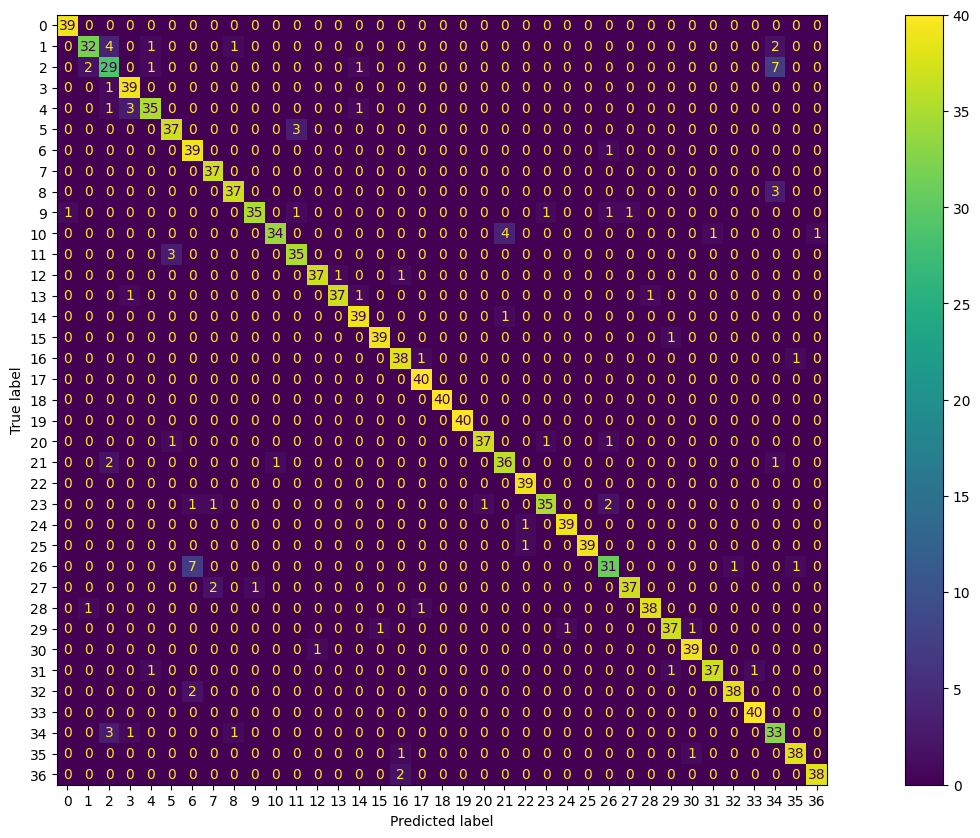

In [34]:
# Plot the confusion matrix
plot_confusion_matrix(test_predictions, test_labels, class_names)

Insights:

High Accuracy Classes: Classes like 0 (Abyssinian), 19 (Tibetan Mastiff), and 20 (Akita) have perfect or near-perfect classification, indicating strong model performance for these classes.


Medium acc classes: Misclassifications often occur between classes that might be visually similar or have similar features. For example, classes 1 (American Bulldog) and 2 (American Pit Bull Terrier) show some confusion.


 Classes with higher misclassification rates:  2 (American Pit Bull Terrier) and 27 (Maltese), indicate areas where the model could be improved.

In [39]:
def plot_predictions(inputs, true_labels, pred_labels, class_names, num_images=5):
    plt.figure(figsize=(30, 20))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        img = inputs[i].cpu().permute(1, 2, 0).numpy()  # Move to CPU and reorder dimensions for plotting
        img = img * 255.0  # Denormalize if necessary

        plt.imshow(img.astype('uint8'))
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
        plt.axis('off')
    plt.show()


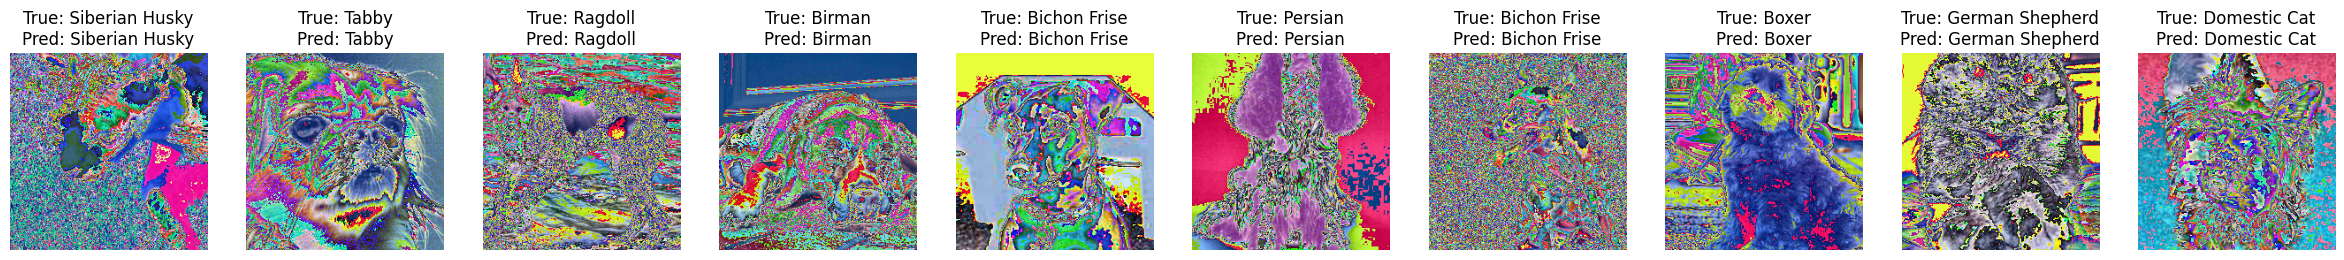

In [40]:
# Get some images from the test set to visualize
inputs, labels = next(iter(test_loader))  # Get a batch of images and labels from the test set

# Plot the first 10 images with their true and predicted labels
plot_predictions(inputs, labels.cpu().numpy(), test_predictions[:10], class_names, num_images=10)